# Import Libraries

In [2]:
# import necessary libraries
import pandas as pd
import re
import nltk
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
# putting drugs data on 'drug' dataframe
drug = pd.read_csv('D:/STATISTIKA/SEMESTER 7/BISMILLAH TA/BISMILLAHIRRAHMANIRRAHIM/Data/00_data_raw_clean.csv', encoding='latin1')
drug.head()

,no,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
0,1,Tiaryt Injection,amiodarone,Fahrenheit,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,NaN,"Sinus bradycardia, sinus arrest & SA block w/o...",Exclusively administer as infusion. Avoid very...,"Local inflammatory reaction eg, superficial ph...",Drugs liable to induce Torsade de pointes: Cla...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
1,2,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",Increased risk of ventricular arrhythmias w/ T...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
2,3,Rytmonorm,NaN,NaN,Propafenone HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01BC03 - propafenone ; Belongs to class Ic an...
3,4,Rexidron,NaN,NaN,Amiodarone HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
4,5,Dopamine HCl DBL,NaN,NaN,Dopamine HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01CA04 - dopamine ; Belongs to the class of a...


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no                        739 non-null    int64 
 1   brand                     739 non-null    object
 2   generic_name              251 non-null    object
 3   manufacturer              285 non-null    object
 4   contents                  739 non-null    object
 5   indications/uses          271 non-null    object
 6   dosage/direction_for_use  271 non-null    object
 7   administration            231 non-null    object
 8   contraindications         226 non-null    object
 9   special_precaution        255 non-null    object
 10  adverse_reactions         254 non-null    object
 11  drug_interactions         195 non-null    object
 12  mims_class                739 non-null    object
 13  atc_classification        739 non-null    object
dtypes: int64(1), object(13)
me

# Data Cleaning + Preprocessing

In [5]:
drug = drug[['brand', 'contents', 'indications/uses', 'dosage/direction_for_use', 'contraindications', 'adverse_reactions']]

In [6]:
drug

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions
0,Tiaryt Injection,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,"Sinus bradycardia, sinus arrest & SA block w/o...","Local inflammatory reaction eg, superficial ph..."
1,Tiaryt,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...","Severe sinus node dysfunction, 2nd- & 3rd-degr...","Corneal microdeposits, photosensitization & pi..."
2,Rytmonorm,Propafenone HCl,NaN,NaN,NaN,NaN
3,Rexidron,Amiodarone HCl,NaN,NaN,NaN,NaN
4,Dopamine HCl DBL,Dopamine HCl,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
734,Mitolife,"?-lipoic acid 100 mg, acetyl L-carnitine HCl 2...",NaN,NaN,NaN,NaN
735,Metsel,"Natural ubidecarenone (CoQ10) 30 mg, synthetic...",NaN,NaN,NaN,NaN
736,Maxtoten Forte,"Co-enzyme Q-10 100 mg, nattokinase 100 mg",Help maintain health.,1 FC caplet once daily.,NaN,NaN
737,L-Core,"Per sachet D-ribose 5 g, L-carnitine fumarate ...",Recovers energy after illness & postsurgery. P...,Add 1 sachet (8 g) powd to 200 mL of water. Ta...,NaN,NaN


In [7]:
# data cleaning
drug.isnull().sum()

brand                         0
contents                      0
indications/uses            468
dosage/direction_for_use    468
contraindications           513
adverse_reactions           485
dtype: int64

In [8]:
# removing duplicates
drug.duplicated(subset='brand').sum()

63

In [9]:
drug = drug.drop_duplicates(subset='brand')
drug.duplicated(subset='brand').sum()

0

In [10]:
drug = drug.dropna()
drug.head()

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions
0,Tiaryt Injection,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,"Sinus bradycardia, sinus arrest & SA block w/o...","Local inflammatory reaction eg, superficial ph..."
1,Tiaryt,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...","Severe sinus node dysfunction, 2nd- & 3rd-degr...","Corneal microdeposits, photosensitization & pi..."
11,Dobuject,Dobutamine HCl,Inotropic support of the myocardium in the tre...,2.5-40 mcg/kg/min as IV infusion. Usually 2.5-...,Obstructive cardiomyopathy. Idiopathic hypertr...,"Nausea, headache, palpitation, dyspnea & chest..."
20,Cardiotone,Dobutamine HCl,Inotropic support in the short-term treatment ...,Rate of infusion: 2.5-10 mcg/kg/min which may ...,Obstructive cardiomyopathy; idiopathic hypertr...,"Increased heart rate, BP, hypotension, phlebit..."
27,Kendaron,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...","Sinus bradycardia, SA block, AV block. Dysthyr...","Gl disturbances, headache, weakness, myalgia, ..."


In [11]:
# replace NaN with an empty string
drug = drug[['brand', 'contents', 'indications/uses', 'dosage/direction_for_use', 'contraindications', 'adverse_reactions']]
drug = drug.fillna(" ")
drug.head()

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions
0,Tiaryt Injection,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,"Sinus bradycardia, sinus arrest & SA block w/o...","Local inflammatory reaction eg, superficial ph..."
1,Tiaryt,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...","Severe sinus node dysfunction, 2nd- & 3rd-degr...","Corneal microdeposits, photosensitization & pi..."
11,Dobuject,Dobutamine HCl,Inotropic support of the myocardium in the tre...,2.5-40 mcg/kg/min as IV infusion. Usually 2.5-...,Obstructive cardiomyopathy. Idiopathic hypertr...,"Nausea, headache, palpitation, dyspnea & chest..."
20,Cardiotone,Dobutamine HCl,Inotropic support in the short-term treatment ...,Rate of infusion: 2.5-10 mcg/kg/min which may ...,Obstructive cardiomyopathy; idiopathic hypertr...,"Increased heart rate, BP, hypotension, phlebit..."
27,Kendaron,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...","Sinus bradycardia, SA block, AV block. Dysthyr...","Gl disturbances, headache, weakness, myalgia, ..."


In [12]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 712
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   brand                     193 non-null    object
 1   contents                  193 non-null    object
 2   indications/uses          193 non-null    object
 3   dosage/direction_for_use  193 non-null    object
 4   contraindications         193 non-null    object
 5   adverse_reactions         193 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


In [13]:
drug

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions
0,Tiaryt Injection,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,"Sinus bradycardia, sinus arrest & SA block w/o...","Local inflammatory reaction eg, superficial ph..."
1,Tiaryt,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...","Severe sinus node dysfunction, 2nd- & 3rd-degr...","Corneal microdeposits, photosensitization & pi..."
11,Dobuject,Dobutamine HCl,Inotropic support of the myocardium in the tre...,2.5-40 mcg/kg/min as IV infusion. Usually 2.5-...,Obstructive cardiomyopathy. Idiopathic hypertr...,"Nausea, headache, palpitation, dyspnea & chest..."
20,Cardiotone,Dobutamine HCl,Inotropic support in the short-term treatment ...,Rate of infusion: 2.5-10 mcg/kg/min which may ...,Obstructive cardiomyopathy; idiopathic hypertr...,"Increased heart rate, BP, hypotension, phlebit..."
27,Kendaron,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...","Sinus bradycardia, SA block, AV block. Dysthyr...","Gl disturbances, headache, weakness, myalgia, ..."
...,...,...,...,...,...,...
682,Venosmil,Hidrosmin,"Varicose vein, venous insufficiency, hemorrhoids.",Cap 1 cap 3 times daily. Topical gel Apply 3-4...,Hypersensitivity.,"Gastric pain, nausea; eruptions, itching, head..."
683,Venodenol,Polidocanol,"Sclerosing of varicose veins of all sizes, dil...",Max daily dose: 2 mg/kg/day. Varicosclerosatio...,"Bedridden patients, impaired arterial circulat...",Hyperpigmentation.
702,Ardium 500,Micronized purified flavonoid fraction (MPFF),Functional symptomatic treatment related to ac...,Acute haemorrhoidal attack 6 tab daily for the...,Hypersensitivity.,"Diarrhoea, dyspepsia, nausea, vomiting. Coliti..."
703,Ardium 1000,Micronized purified flavonoid fraction (MPFF),Helps to treat functional symptoms related to ...,Acute hemorrhoid 3 tab daily for the first 4 d...,Hypersensitivity.,"Diarrhoea, dyspepsia, nausea, vomiting. Coliti..."


[Text(0.5, 1.0, 'Top 7 Contents of Cardiovascular Drugs')]

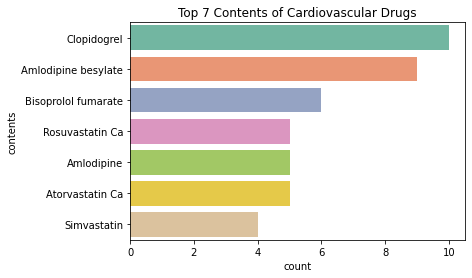

In [14]:
sns.countplot(y="contents", data=drug, palette="Set2", order=drug.contents.value_counts().iloc[:7].index).set(title='Top 7 Contents of Cardiovascular Drugs')

In [15]:
# make new column with overall infos
drug = drug.reset_index(drop=True)
overall_infos = []
for i in range(0, drug.shape[0]):
    overall_infos.append(drug['brand'][i]+' '+drug['contents'][i]+' '+drug['indications/uses'][i]+' '+drug['dosage/direction_for_use'][i]+' '+drug['contraindications'][i]+' '+drug['adverse_reactions'][i])
drug['overall_infos'] = overall_infos

In [16]:
file_name = '01_drug_clean.xlsx'
  
# saving the excel 
drug.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Case Folding

In [17]:
# Case Folding
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding  
drug['lwr'] = drug['overall_infos'].apply(clean_lower)

In [18]:
# Replace words that have the same meaning or typo
def replace(text):
    replace = str(text)
    replace = re.sub("administerd", lambda x: 'administered', replace)
    replace = re.sub("antiarrythmic", lambda x: 'antiarrhythmic', replace)
    replace = re.sub("antihypertensice", lambda x: 'antihypertensive', replace)
    replace = re.sub("hetrozygous", lambda x: 'heterozygous', replace)
    replace = re.sub("hypercholeterolemia", lambda x: 'hypercholesterolemia', replace)
    replace = re.sub("hyperhydrosis", lambda x: 'hyperhidrosis', replace)
    replace = re.sub("hypertriglyceridaemia", lambda x: 'hypertriglyceridemia', replace)
    replace = re.sub("hypertropic", lambda x: 'hypertrophic', replace)
    replace = re.sub("initally", lambda x: 'initially', replace)
    replace = re.sub("natriuteric", lambda x: 'natriuretic', replace)
    replace = re.sub("occlussive", lambda x: 'occlusive', replace)
    replace = re.sub("phaeochoromocytoma", lambda x: 'phaeochromocytoma', replace)
    replace = re.sub("revascularisation", lambda x: 'revascularization', replace)
    replace = re.sub("rhabdomiolysis", lambda x: 'rhabdomyolysis', replace)
    replace = re.sub("thrombocytopaenia", lambda x: 'thrombocytopenia', replace)
    replace = re.sub("yr", lambda x: 'year', replace)
    return replace.strip(" ")
drug['rplc'] = drug['lwr'].apply(replace)

In [19]:
casefolding=pd.DataFrame(data=drug, columns=('overall_infos', 'rplc'))
casefolding

,overall_infos,rplc
0,Tiaryt Injection Amiodarone HCl Serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...
1,Tiaryt Amiodarone HCl Suppression & prevention...,tiaryt amiodarone hcl suppression & prevention...
2,Dobuject Dobutamine HCl Inotropic support of t...,dobuject dobutamine hcl inotropic support of t...
3,Cardiotone Dobutamine HCl Inotropic support in...,cardiotone dobutamine hcl inotropic support in...
4,Kendaron Amiodarone HCl Tab: Recurrent ventric...,kendaron amiodarone hcl tab: recurrent ventric...
...,...,...
188,"Venosmil Hidrosmin Varicose vein, venous insuf...","venosmil hidrosmin varicose vein, venous insuf..."
189,Venodenol Polidocanol Sclerosing of varicose v...,venodenol polidocanol sclerosing of varicose v...
190,Ardium 500 Micronized purified flavonoid fract...,ardium 500 micronized purified flavonoid fract...
191,Ardium 1000 Micronized purified flavonoid frac...,ardium 1000 micronized purified flavonoid frac...


In [20]:
file_name = '02_casefolding.xlsx'
  
# saving the excel 
casefolding.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Remove Punctuation

In [21]:
# Remove Punctuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')

def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
drug['clean_punct'] = drug['rplc'].apply(clean_punct)

In [22]:
drug['clean_punct']

0      tiaryt injection amiodarone hcl serious rhythm...
1      tiaryt amiodarone hcl suppression   prevention...
2      dobuject dobutamine hcl inotropic support of t...
3      cardiotone dobutamine hcl inotropic support in...
4      kendaron amiodarone hcl tab  recurrent ventric...
                             ...                        
188    venosmil hidrosmin varicose vein venous insuff...
189    venodenol polidocanol sclerosing of varicose v...
190    ardium 500 micronized purified flavonoid fract...
191    ardium 1000 micronized purified flavonoid frac...
192    praxilene naftidrofuryl oxalate peripheral vas...
Name: clean_punct, Length: 193, dtype: object

In [23]:
remove_punct=pd.DataFrame(data=drug, columns=('lwr','clean_punct'))
remove_punct

,lwr,clean_punct
0,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...
1,tiaryt amiodarone hcl suppression & prevention...,tiaryt amiodarone hcl suppression prevention...
2,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support of t...
3,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support in...
4,kendaron amiodarone hcl tab: recurrent ventric...,kendaron amiodarone hcl tab recurrent ventric...
...,...,...
188,"venosmil hidrosmin varicose vein, venous insuf...",venosmil hidrosmin varicose vein venous insuff...
189,venodenol polidocanol sclerosing of varicose v...,venodenol polidocanol sclerosing of varicose v...
190,ardium 500 micronized purified flavonoid fract...,ardium 500 micronized purified flavonoid fract...
191,ardium 1000 micronized purified flavonoid frac...,ardium 1000 micronized purified flavonoid frac...


In [24]:
file_name = '03_remove_punctuation.xlsx'
  
# saving the excel 
remove_punct.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Remove Double Whitespace

In [25]:
# Remove Double Whitespace
def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
drug['clean_double_ws'] = drug['clean_punct'].apply(_normalize_whitespace)

In [26]:
drug['clean_double_ws']

0      tiaryt injection amiodarone hcl serious rhythm...
1      tiaryt amiodarone hcl suppression prevention o...
2      dobuject dobutamine hcl inotropic support of t...
3      cardiotone dobutamine hcl inotropic support in...
4      kendaron amiodarone hcl tab recurrent ventricu...
                             ...                        
188    venosmil hidrosmin varicose vein venous insuff...
189    venodenol polidocanol sclerosing of varicose v...
190    ardium 500 micronized purified flavonoid fract...
191    ardium 1000 micronized purified flavonoid frac...
192    praxilene naftidrofuryl oxalate peripheral vas...
Name: clean_double_ws, Length: 193, dtype: object

In [27]:
clean_dbl_ws=pd.DataFrame(data=drug, columns=('clean_punct','clean_double_ws'))
clean_dbl_ws

,clean_punct,clean_double_ws
0,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...
1,tiaryt amiodarone hcl suppression prevention...,tiaryt amiodarone hcl suppression prevention o...
2,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support of t...
3,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support in...
4,kendaron amiodarone hcl tab recurrent ventric...,kendaron amiodarone hcl tab recurrent ventricu...
...,...,...
188,venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...
189,venodenol polidocanol sclerosing of varicose v...,venodenol polidocanol sclerosing of varicose v...
190,ardium 500 micronized purified flavonoid fract...,ardium 500 micronized purified flavonoid fract...
191,ardium 1000 micronized purified flavonoid frac...,ardium 1000 micronized purified flavonoid frac...


In [28]:
file_name = '04_remove_dbl_ws.xlsx'
  
# saving the excel 
clean_dbl_ws.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Stopword Removal

In [29]:
# Stopword Removal
stopword = set(stopwords.words('english'))


def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
drug['clean_sw'] = drug['clean_double_ws'].apply(clean_stopwords)
     

In [30]:
drug['clean_sw']

0      tiaryt injection amiodarone hcl serious rhythm...
1      tiaryt amiodarone hcl suppression prevention l...
2      dobuject dobutamine hcl inotropic support myoc...
3      cardiotone dobutamine hcl inotropic support sh...
4      kendaron amiodarone hcl tab recurrent ventricu...
                             ...                        
188    venosmil hidrosmin varicose vein venous insuff...
189    venodenol polidocanol sclerosing varicose vein...
190    ardium 500 micronized purified flavonoid fract...
191    ardium 1000 micronized purified flavonoid frac...
192    praxilene naftidrofuryl oxalate peripheral vas...
Name: clean_sw, Length: 193, dtype: object

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
clean_stopwordsfix=pd.DataFrame(data=drug, columns=('clean_double_ws','clean_sw'))
clean_stopwordsfix

,clean_double_ws,clean_sw
0,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...
1,tiaryt amiodarone hcl suppression prevention o...,tiaryt amiodarone hcl suppression prevention l...
2,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support myoc...
3,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support sh...
4,kendaron amiodarone hcl tab recurrent ventricu...,kendaron amiodarone hcl tab recurrent ventricu...
...,...,...
188,venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...
189,venodenol polidocanol sclerosing of varicose v...,venodenol polidocanol sclerosing varicose vein...
190,ardium 500 micronized purified flavonoid fract...,ardium 500 micronized purified flavonoid fract...
191,ardium 1000 micronized purified flavonoid frac...,ardium 1000 micronized purified flavonoid frac...


In [33]:
file_name = '05_remove_stopword.xlsx'
  
# saving the excel 
clean_stopwordsfix.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Lemmatization

In [34]:
# Lemmatization
wn= nltk.WordNetLemmatizer()

In [35]:
def lemmatization(text):
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

In [36]:
# Buat kolom tambahan untuk data description yang telah dilemmatization   
drug['desc_clean_lemma'] = drug['clean_sw'].apply(lemmatization)

In [37]:
drug['desc_clean_lemma']

0      tiaryt injection amiodarone hcl serious rhythm...
1      tiaryt amiodarone hcl suppression prevention l...
2      dobuject dobutamine hcl inotropic support myoc...
3      cardiotone dobutamine hcl inotropic support sh...
4      kendaron amiodarone hcl tab recurrent ventricu...
                             ...                        
188    venosmil hidrosmin varicose vein venous insuff...
189    venodenol polidocanol sclerosing varicose vein...
190    ardium 500 micronized purify flavonoid fractio...
191    ardium 1000 micronized purify flavonoid fracti...
192    praxilene naftidrofuryl oxalate peripheral vas...
Name: desc_clean_lemma, Length: 193, dtype: object

In [38]:
lemmatization=pd.DataFrame(data=drug, columns = ('clean_sw', 'desc_clean_lemma'))

In [39]:
file_name = '06_lemmatization.xlsx'
  
# saving the excel 
lemmatization.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Tokenizing

In [40]:
# Tokenizing
regexp = RegexpTokenizer('\s+', gaps=True)

drug['tokenize']=drug['desc_clean_lemma'].apply(regexp.tokenize)
drug['tokenize']

0      [tiaryt, injection, amiodarone, hcl, serious, ...
1      [tiaryt, amiodarone, hcl, suppression, prevent...
2      [dobuject, dobutamine, hcl, inotropic, support...
3      [cardiotone, dobutamine, hcl, inotropic, suppo...
4      [kendaron, amiodarone, hcl, tab, recurrent, ve...
                             ...                        
188    [venosmil, hidrosmin, varicose, vein, venous, ...
189    [venodenol, polidocanol, sclerosing, varicose,...
190    [ardium, 500, micronized, purify, flavonoid, f...
191    [ardium, 1000, micronized, purify, flavonoid, ...
192    [praxilene, naftidrofuryl, oxalate, peripheral...
Name: tokenize, Length: 193, dtype: object

In [41]:
tokenizing=pd.DataFrame(data=drug, columns = ('desc_clean_lemma', 'tokenize'))

In [42]:
file_name = '07_tokenizing.xlsx'
  
# saving the excel 
tokenizing.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# TF-IDF

In [43]:
# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
drug['tokenize']=drug['desc_clean_lemma'].apply(regexp.tokenize).apply(lambda x: ' '.join(x))

# obtain TF-IDF values for each word in each document
tfidf = vectorizer.fit_transform(drug['tokenize']).toarray()
features = vectorizer.get_feature_names()

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
# Create dataframe
tfidf=pd.DataFrame(tfidf,columns=features)
tfidf

,01,02,10,100,1000,10000,100000mm3,1010,102,1020,...,women,worsen,wout,wt,xa,xanthopsia,year,zanidip,zevask,zok
0,0.0,0.0,0.040007,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.056087,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.082537,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.055334,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.043550,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
189,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
190,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
191,0.0,0.0,0.000000,0.000000,0.135674,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [45]:
file_name = '08_TF-IDF.xlsx'
  
# saving the excel 
tfidf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [46]:
# Term Frequency
count_vectorizer= CountVectorizer(encoding='latin-1', ngram_range=(1,1), 
                                  tokenizer=None, analyzer='word',
                                  stop_words='english')
countvec= count_vectorizer.fit_transform(drug['tokenize'])

In [47]:
# Create dataframe
tf=pd.DataFrame(countvec.toarray(),columns=count_vectorizer.get_feature_names())
tf

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,01,02,10,100,1000,10000,100000mm3,1010,102,1020,...,women,worsen,wout,wt,xa,xanthopsia,year,zanidip,zevask,zok
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
file_name = '09_tf.xlsx'
  
# saving the excel 
tf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Recommmender System with Cosine Similarity

In [49]:
# building Recommender System using Cosine Similarity
# compute the Cosine Similarity
similarity_matrix = cosine_similarity(tfidf, tfidf)

# create a pandas series with drugs brand as indices and indices as series values 
indices = pd.Series(drug.index, index=drug['brand']).drop_duplicates()

In [50]:
indices

brand
Tiaryt Injection      0
Tiaryt                1
Dobuject              2
Cardiotone            3
Kendaron              4
                   ... 
Venosmil            188
Venodenol           189
Ardium 500          190
Ardium 1000         191
Praxilene           192
Length: 193, dtype: int64

In [51]:
similarity_matrix

array([[1.        , 0.17241169, 0.04075335, ..., 0.03317269, 0.03277034,
        0.09432625],
       [0.17241169, 1.        , 0.01520383, ..., 0.00935516, 0.01074291,
        0.03908755],
       [0.04075335, 0.01520383, 1.        , ..., 0.02948833, 0.02286252,
        0.01639877],
       ...,
       [0.03317269, 0.00935516, 0.02948833, ..., 1.        , 0.64659083,
        0.04618153],
       [0.03277034, 0.01074291, 0.02286252, ..., 0.64659083, 1.        ,
        0.0507004 ],
       [0.09432625, 0.03908755, 0.01639877, ..., 0.04618153, 0.0507004 ,
        1.        ]])

## Cosine Similarity

In [52]:
similarity = pd.DataFrame(similarity_matrix, columns=drug['brand'], index=drug['brand']).reset_index()
similarity

brand,brand,Tiaryt Injection,Tiaryt,Dobuject,Cardiotone,Kendaron,Inovad,Inotrop,Indop,Fargoxin,...,Rinclo,Proxime,Pradaxa,Vaclo,Ticuring,Venosmil,Venodenol,Ardium 500,Ardium 1000,Praxilene
0,Tiaryt Injection,1.000000,0.172412,0.040753,0.130856,0.382266,0.155707,0.095713,0.046488,0.174173,...,0.037309,0.028853,0.039759,0.042273,0.068107,0.004912,0.025765,0.033173,0.032770,0.094326
1,Tiaryt,0.172412,1.000000,0.015204,0.070407,0.222005,0.128366,0.109439,0.040908,0.176461,...,0.031682,0.062313,0.106412,0.064774,0.022539,0.010611,0.024504,0.009355,0.010743,0.039088
2,Dobuject,0.040753,0.015204,1.000000,0.479674,0.087762,0.051065,0.395140,0.242000,0.019498,...,0.010103,0.021512,0.021373,0.019361,0.023381,0.016938,0.004351,0.029488,0.022863,0.016399
3,Cardiotone,0.130856,0.070407,0.479674,1.000000,0.111236,0.104868,0.694237,0.243623,0.174510,...,0.015707,0.027730,0.056396,0.050936,0.016998,0.007690,0.020440,0.010942,0.005190,0.064102
4,Kendaron,0.382266,0.222005,0.087762,0.111236,1.000000,0.248879,0.127087,0.044308,0.305801,...,0.030721,0.044580,0.055335,0.026158,0.097370,0.043275,0.021768,0.075233,0.075639,0.111724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venosmil,0.004912,0.010611,0.016938,0.007690,0.043275,0.006624,0.000000,0.010916,0.009312,...,0.023248,0.044292,0.058977,0.004227,0.004013,1.000000,0.187611,0.073333,0.170050,0.048405
189,Venodenol,0.025765,0.024504,0.004351,0.020440,0.021768,0.024304,0.013804,0.013177,0.024822,...,0.022292,0.028155,0.024110,0.041331,0.008139,0.187611,1.000000,0.019631,0.107151,0.016989
190,Ardium 500,0.033173,0.009355,0.029488,0.010942,0.075233,0.006255,0.000000,0.031363,0.086152,...,0.055015,0.078828,0.045541,0.008602,0.036724,0.073333,0.019631,1.000000,0.646591,0.046182
191,Ardium 1000,0.032770,0.010743,0.022863,0.005190,0.075639,0.004471,0.000000,0.039187,0.098932,...,0.067318,0.086959,0.051119,0.009878,0.050659,0.170050,0.107151,0.646591,1.000000,0.050700


In [53]:
file_name = '10_similarity.xlsx'
  
# saving the excel 
similarity.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [54]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix):
  # Get the index corresponding to original_brand
  idx = indices[brand]

  # Get the pairwise similarity scores
  sim_scores = drug[drug['brand'] == brand].index[0]
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the brand
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Scores of the 10 most similar movies
  sim_scores = sim_scores[1:8]

  # Brand indices
  brand_indices = [i[0] for i in sim_scores]

  # Top 7 most similar brand

  return drug.iloc[brand_indices]

In [55]:
check = make_recommendation('Pladogrel')
check

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions,overall_infos,lwr,rplc,clean_punct,clean_double_ws,clean_sw,desc_clean_lemma,tokenize
162,Artepid,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,"Active pathological bleeding, peptic ulcer, in...","Headache, dizziness, paresthesia, GI & hematol...",Artepid Clopidogrel Reduction of atherothrombo...,artepid clopidogrel reduction of atherothrombo...,artepid clopidogrel reduction of atherothrombo...,artepid clopidogrel reduction of atherothrombo...,artepid clopidogrel reduction of atherothrombo...,artepid clopidogrel reduction atherothrombotic...,artepid clopidogrel reduction atherothrombotic...,artepid clopidogrel reduction atherothrombotic...
183,Rinclo,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,Hypersensitivity. Active pathological bleeding...,"Severe neutropaenia & thrombocytopaenia, aplas...",Rinclo Clopidogrel Reduction of atherothrombot...,rinclo clopidogrel reduction of atherothrombot...,rinclo clopidogrel reduction of atherothrombot...,rinclo clopidogrel reduction of atherothrombot...,rinclo clopidogrel reduction of atherothrombot...,rinclo clopidogrel reduction atherothrombotic ...,rinclo clopidogrel reduction atherothrombotic ...,rinclo clopidogrel reduction atherothrombotic ...
181,Simclovix,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,"Hypersensitivity. Severe liver dysfunction, ac...","Bleeding, hematological effects; CNS & periphe...",Simclovix Clopidogrel Reduces atherothrombotic...,simclovix clopidogrel reduces atherothrombotic...,simclovix clopidogrel reduces atherothrombotic...,simclovix clopidogrel reduces atherothrombotic...,simclovix clopidogrel reduces atherothrombotic...,simclovix clopidogrel reduces atherothrombotic...,simclovix clopidogrel reduce atherothrombotic ...,simclovix clopidogrel reduce atherothrombotic ...
180,Therodel,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,Hypersensitivity. Peptic ulcer or intracranial...,"Bleeding, hematological & GI system disorders.",Therodel Clopidogrel Prevention of atherothrom...,therodel clopidogrel prevention of atherothrom...,therodel clopidogrel prevention of atherothrom...,therodel clopidogrel prevention of atherothrom...,therodel clopidogrel prevention of atherothrom...,therodel clopidogrel prevention atherothrombot...,therodel clopidogrel prevention atherothrombot...,therodel clopidogrel prevention atherothrombot...
177,Platogrix,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,Hypersensitivity. Active pathological bleeding...,"Haematoma. Epistaxis. GI haemorrhage, diarrhoe...",Platogrix Clopidogrel Secondary prevention of ...,platogrix clopidogrel secondary prevention of ...,platogrix clopidogrel secondary prevention of ...,platogrix clopidogrel secondary prevention of ...,platogrix clopidogrel secondary prevention of ...,platogrix clopidogrel secondary prevention ath...,platogrix clopidogrel secondary prevention ath...,platogrix clopidogrel secondary prevention ath...
176,Plavix,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,Hypersensitivity. Active pathological bleeding...,"Haematoma; epistaxis; GI haemorrhage, diarrhoe...",Plavix Clopidogrel Secondary prevention of ath...,plavix clopidogrel secondary prevention of ath...,plavix clopidogrel secondary prevention of ath...,plavix clopidogrel secondary prevention of ath...,plavix clopidogrel secondary prevention of ath...,plavix clopidogrel secondary prevention athero...,plavix clopidogrel secondary prevention athero...,plavix clopidogrel secondary prevention athero...
172,Pidovix,Clopidogrel,Reduce atherothrombotic events in 

In [56]:
file_name = '11_recommender_system.xlsx'
  
# saving the excel 
check.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Recommender System

In [57]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix, threshold=0.35):
    # Get the index corresponding to original_brand
    idx = indices[brand]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Filter the similarity scores based on the threshold
    filtered_sim_scores = [score for score in sim_scores if score[1] > threshold]

    # Sort the brand
    filtered_sim_scores = sorted(filtered_sim_scores, key=lambda x: x[1], reverse=True)

    # Matching the similarities to the brand details
    ranked_brands = []
    for i in range(1, min(15, len(filtered_sim_scores))):
        indx = filtered_sim_scores[i][0]
        ranked_brands.append([
            drug.iloc[indx, 0],
            drug.iloc[indx, 1],
            drug.iloc[indx, 2],
            drug.iloc[indx, 3],
            drug.iloc[indx, 4],
            drug.iloc[indx, 5],
            filtered_sim_scores[i][1]
        ])

    df = pd.DataFrame(ranked_brands, columns=["Brand", "Contents", "Indications/Uses", "Dosage/direction_for_use", 
                                              "Contraindications", "Adverse Reactions", "Similarity Score"])
    return df


In [58]:
test = make_recommendation('Pladogrel')
test

,Brand,Contents,Indications/Uses,Dosage/direction_for_use,Contraindications,Adverse Reactions,Similarity Score
0,Artepid,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,"Active pathological bleeding, peptic ulcer, in...","Headache, dizziness, paresthesia, GI & hematol...",0.861078
1,Rinclo,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,Hypersensitivity. Active pathological bleeding...,"Severe neutropaenia & thrombocytopaenia, aplas...",0.420832
2,Simclovix,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,"Hypersensitivity. Severe liver dysfunction, ac...","Bleeding, hematological effects; CNS & periphe...",0.405506
3,Therodel,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,Hypersensitivity. Peptic ulcer or intracranial...,"Bleeding, hematological & GI system disorders.",0.405438
4,Platogrix,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,Hypersensitivity. Active pathological bleeding...,"Haematoma. Epistaxis. GI haemorrhage, diarrhoe...",0.377020
5,Plavix,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,Hypersensitivity. Active pathological bleeding...,"Haematoma; epistaxis; GI haemorrhage, diarrhoe...",0.364583


In [59]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix):
  # Get the index corresponding to original_brand
  idx = indices[brand]

  # Get the pairwise similarity scores
  sim_scores = drug[drug['brand'] == brand].index[0]
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the brand
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Scores of the 10 most similar movies
  sim_scores = sim_scores[1:8]

  # Brand indices
  brand_indices = [i[0] for i in sim_scores]

  df1 = pd.DataFrame(drug, columns=['brand', 'generic_name', 'manufacturer', 'contents', 'indications/uses', 'dosage/direction_for_use', 'administration', 'contraindications', 'special_precaution', 'adverse_reactions', 'drug_interactions', 'mims_class', 'atc_classification'], index=[idx])
  df2 = pd.DataFrame(drug, columns=['brand', 'generic_name', 'manufacturer', 'contents', 'indications/uses', 'dosage/direction_for_use', 'administration', 'contraindications', 'special_precaution', 'adverse_reactions', 'drug_interactions', 'mims_class', 'atc_classification'], index=brand_indices)
  
  return df1, df2

In [60]:
a, b = make_recommendation('Pladogrel')
display(a, b)

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
178,Pladogrel,NaN,NaN,Clopidogrel,Reduction of atherothrombotic event in patient...,Adult 75 mg once daily. Unstable angina 300 mg...,NaN,"Active pathological bleeding eg, peptic ulcer,...",NaN,"Headache, dizziness, paresthesia, GI & hematol...",NaN,NaN,NaN


,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
162,Artepid,NaN,NaN,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,NaN,"Active pathological bleeding, peptic ulcer, in...",NaN,"Headache, dizziness, paresthesia, GI & hematol...",NaN,NaN,NaN
183,Rinclo,NaN,NaN,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,NaN,Hypersensitivity. Active pathological bleeding...,NaN,"Severe neutropaenia & thrombocytopaenia, aplas...",NaN,NaN,NaN
181,Simclovix,NaN,NaN,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,NaN,"Hypersensitivity. Severe liver dysfunction, ac...",NaN,"Bleeding, hematological effects; CNS & periphe...",NaN,NaN,NaN
180,Therodel,NaN,NaN,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,NaN,Hypersensitivity. Peptic ulcer or intracranial...,NaN,"Bleeding, hematological & GI system disorders.",NaN,NaN,NaN
177,Platogrix,NaN,NaN,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,NaN,Hypersensitivity. Active pathological bleeding...,NaN,"Haematoma. Epistaxis. GI haemorrhage, diarrhoe...",NaN,NaN,NaN
176,Plavix,NaN,NaN,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,NaN,Hypersensitivity. Active pathological bleeding...,NaN,"Haematoma; epistaxis; GI haemorrhage, diarrhoe...",NaN,NaN,NaN
172,Pidovix,NaN,NaN,Clopidogrel,Reduce atherothrombotic events in patients w/ ...,Adult & elderly 75 mg as a single dose.,NaN,"Severe impaired liver function, active patholo...",NaN,"Purpura, bruising, hematoma, epistaxis, hematu...",NaN,NaN,NaN


In [61]:
drug

,brand,contents,indications/uses,dosage/direction_for_use,contraindications,adverse_reactions,overall_infos,lwr,rplc,clean_punct,clean_double_ws,clean_sw,desc_clean_lemma,tokenize
0,Tiaryt Injection,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,"Sinus bradycardia, sinus arrest & SA block w/o...","Local inflammatory reaction eg, superficial ph...",Tiaryt Injection Amiodarone HCl Serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...,tiaryt injection amiodarone hcl serious rhythm...
1,Tiaryt,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...","Severe sinus node dysfunction, 2nd- & 3rd-degr...","Corneal microdeposits, photosensitization & pi...",Tiaryt Amiodarone HCl Suppression & prevention...,tiaryt amiodarone hcl suppression & prevention...,tiaryt amiodarone hcl suppression & prevention...,tiaryt amiodarone hcl suppression prevention...,tiaryt amiodarone hcl suppression prevention o...,tiaryt amiodarone hcl suppression prevention l...,tiaryt amiodarone hcl suppression prevention l...,tiaryt amiodarone hcl suppression prevention l...
2,Dobuject,Dobutamine HCl,Inotropic support of the myocardium in the tre...,2.5-40 mcg/kg/min as IV infusion. Usually 2.5-...,Obstructive cardiomyopathy. Idiopathic hypertr...,"Nausea, headache, palpitation, dyspnea & chest...",Dobuject Dobutamine HCl Inotropic support of t...,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support of t...,dobuject dobutamine hcl inotropic support myoc...,dobuject dobutamine hcl inotropic support myoc...,dobuject dobutamine hcl inotropic support myoc...
3,Cardiotone,Dobutamine HCl,Inotropic support in the short-term treatment ...,Rate of infusion: 2.5-10 mcg/kg/min which may ...,Obstructive cardiomyopathy; idiopathic hypertr...,"Increased heart rate, BP, hypotension, phlebit...",Cardiotone Dobutamine HCl Inotropic support in...,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support in...,cardiotone dobutamine hcl inotropic support sh...,cardiotone dobutamine hcl inotropic support sh...,cardiotone dobutamine hcl inotropic support sh...
4,Kendaron,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...","Sinus bradycardia, SA block, AV block. Dysthyr...","Gl disturbances, headache, weakness, myalgia, ...",Kendaron Amiodarone HCl Tab: Recurrent ventric...,kendaron amiodarone hcl tab: recurrent ventric...,kendaron amiodarone hcl tab: recurrent ventric...,kendaron amiodarone hcl tab recurrent ventric...,kendaron amiodarone hcl tab recurrent ventricu...,kendaron amiodarone hcl tab recurrent ventricu...,kendaron amiodarone hcl tab recurrent ventricu...,kendaron amiodarone hcl tab recurrent ventricu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venosmil,Hidrosmin,"Varicose vein, venous insufficiency, hemorrhoids.",Cap 1 cap 3 times daily. Topical gel Apply 3-4...,Hypersensitivity.,"Gastric pain, nausea; eruptions, itching, head...","Venosmil Hidrosmin Varicose vein, venous insuf...","venosmil hidrosmin varicose vein, venous insuf...","venosmil hidrosmin varicose vein, venous insuf...",venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...,venosmil hidrosmin varicose vein venous insuff...
18

In [62]:
file_name = '11_drug_130.xlsx'
  
# saving the excel 
drug.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [63]:
selected_column = 'contents'

# Menghitung jumlah setiap kategori dalam kolom yang dipilih
kategori_counts = drug[selected_column].value_counts()

# Menampilkan hasil dalam bentuk tabel
print(kategori_counts.to_frame().reset_index().rename(columns={selected_column: 'Jumlah', 'index': selected_column}))

                                              contents  Jumlah
0                                          Clopidogrel      10
1                                  Amlodipine besylate       9
2                                  Bisoprolol fumarate       6
3                                      Rosuvastatin Ca       5
4                                           Amlodipine       5
..                                                 ...     ...
106     Irbesartan 300 mg, hydrochlorothiazide 12.5 mg       1
107  Amlodipine besylate 5 mg, atorvastatin Ca trih...       1
108  Alteplase (recombinant human tissue-type plasm...       1
109                                      Terazosin HCl       1
110                          Norepinephrine bitartrate       1

[111 rows x 2 columns]


In [64]:
file_name = '12_jumlah_contents.xlsx'
  
# saving the excel 
drug.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [65]:
pickle.dump(drug,open('drug.pkl','wb'))

In [66]:
pickle.dump(similarity_matrix,open('similarity_matrix.pkl','wb'))